# Dimension Test
This test was created to investigate if the dimensions has redundant zero values. To measure redundant zero layers firstly indexex of the brain area in 3D space found. Then remain space out of the 3D brain area showed us the zero layers.

Let's say if the largest layer in coronal orientation starts on 25.pixel and ends on 200.layer its width is 175 pixel. So 255-175 = 80 layers in coronal orientation is full of zeros.

However, it looks that putting efort to rescaling images in the first place may be not worthful. Check details below. 
Date: 00:32 30/01/2022

In [1]:
import json
import os

import matplotlib.pyplot as plt
import nibabel as nib
import numpy as np
import pandas as pd

from modules.Utils import get_file_names

In [41]:
path_data = "feta_2.1/"

meta_data = pd.read_csv(os.path.join(path_data, "participants.tsv"), sep="\t")
subjects = meta_data["participant_id"].to_list()
files = get_file_names(path_data)

In [3]:
def find_index(indexes):
    for i, item in enumerate(indexes):
        if not item:
            return i

In [4]:
def get_slice_info(arr):
    edge_size = 256
    slice_indexes = {'x':[],
                     'y':[],
                     'z':[],
                    }
    
    indexes = [np.all(arr[i, :, :]==0) for i in range(edge_size)]
    start_point = find_index(indexes)
    slice_indexes['x'].append(start_point)
    indexes.reverse()
    stop_point = edge_size - find_index(indexes) - 1
    slice_indexes['x'].append(stop_point)
    slice_indexes['x'].append(stop_point-start_point)
    
    indexes = [np.all(arr[:, i, :]==0) for i in range(edge_size)]
    start_point = find_index(indexes)
    slice_indexes['y'].append(start_point)
    indexes.reverse()
    stop_point = edge_size - find_index(indexes) - 1
    slice_indexes['y'].append(stop_point)
    slice_indexes['y'].append(stop_point-start_point)
    
    indexes = [np.all(arr[:, :, i]==0) for i in range(edge_size)]
    start_point = find_index(indexes)
    slice_indexes['z'].append(start_point)
    indexes.reverse()
    stop_point = edge_size - find_index(indexes) - 1
    slice_indexes['z'].append(stop_point)
    slice_indexes['z'].append(stop_point-start_point)
    
    return slice_indexes

In [5]:
slice_info_image = {}
slice_info_mask = {}

for sub in subjects:    
    image = nib.load(files[sub][0]).get_fdata()
    info = get_slice_info(image)
    slice_info_image[sub] = []
    [slice_info_image[sub].append(item) for col in info.items() for item in col[1]]
    
    mask = nib.load(files[sub][1]).get_fdata()
    info = get_slice_info(mask)
    slice_info_mask[sub] = []
    [slice_info_mask[sub].append(item) for col in info.items() for item in col[1]]

In [6]:
cols = ["x_start_point", "x_end_point", "x_width", 
        "y_start_point", "y_end_point", "y_width",
        "z_start_point", "z_end_point", "z_width"]

In [35]:
df_images = pd.DataFrame(slice_info_image).transpose()
df_images.columns = cols
df_images.max(axis=0)

x_start_point     47
x_end_point      228
x_width          221
y_start_point     65
y_end_point      255
y_width          255
z_start_point     50
z_end_point      235
z_width          235
dtype: int64

In [36]:
df_images.min(axis=0)

x_start_point      0
x_end_point      106
x_width          103
y_start_point      0
y_end_point      130
y_width          128
z_start_point      0
z_end_point      119
z_width          110
dtype: int64

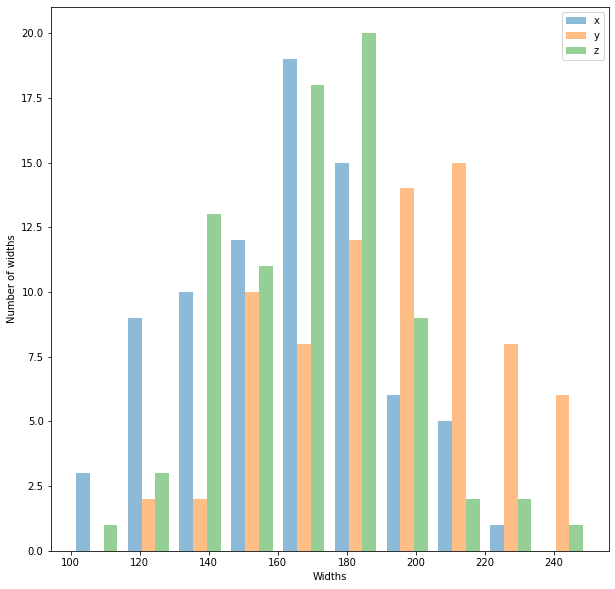

In [37]:
# Width range for images.
bins = np.arange(100, 255, 15) # fixed bin size

plt.figure(figsize=(10, 10))
x_data = df_images.x_width.to_list()
y_data = df_images.y_width.to_list()
z_data = df_images.z_width.to_list()
plt.hist([x_data, y_data, z_data], label=['x', 'y', 'z'], bins=bins, alpha=0.5)
plt.legend(loc='upper right')
plt.ylabel("Number of widths")
plt.xlabel("Widths")
plt.show()

In [38]:
df_masks = pd.DataFrame(slice_info_mask).transpose()
df_masks.columns = cols
df_masks.max(axis=0)

x_start_point     54
x_end_point      212
x_width          191
y_start_point     71
y_end_point      255
y_width          239
z_start_point     67
z_end_point      213
z_width          190
dtype: int64

In [39]:
df_masks.min(axis=0)

x_start_point      4
x_end_point       94
x_width           81
y_start_point      9
y_end_point      118
y_width          103
z_start_point      0
z_end_point      106
z_width           93
dtype: int64

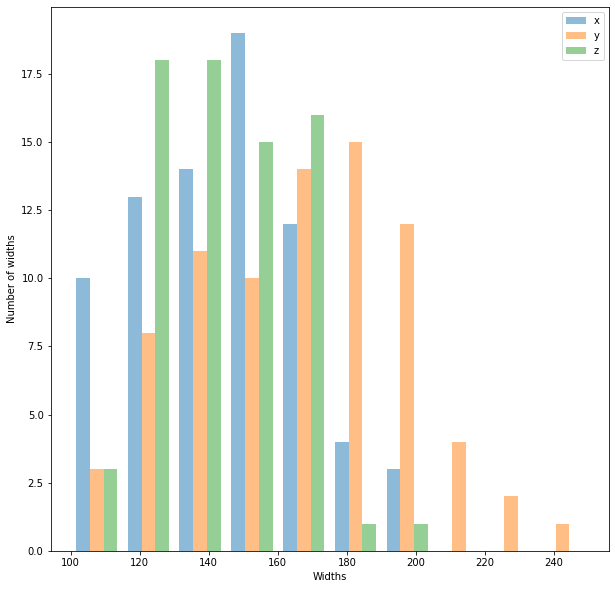

In [40]:
# Width range for masks.
bins = np.arange(100, 255, 15) # fixed bin size

plt.figure(figsize=(10, 10))
x_data = df_masks.x_width.to_list()
y_data = df_masks.y_width.to_list()
z_data = df_masks.z_width.to_list()
plt.hist([x_data, y_data, z_data], label=['x', 'y', 'z'], bins=bins, alpha=0.5)
plt.legend(loc='upper right')
plt.ylabel("Number of widths")
plt.xlabel("Widths")
plt.show()

In [ ]:
idx = get_slice_info(mask)
fig, ax = plt.subplots(3, 2, figsize=(8, 8))
ax[0, 0].imshow(mask[idx['x'][0], :, :])
ax[0, 1].imshow(mask[idx['x'][1], :, :])
ax[1, 0].imshow(mask[:, idx['y'][0], :])
ax[1, 1].imshow(mask[:, idx['y'][1], :])
ax[2, 0].imshow(mask[:, :, idx['z'][0]])
ax[2, 1].imshow(mask[:, :, idx['z'][1]])
plt.show()